<a href="https://colab.research.google.com/github/Aya-Jafar/Python/blob/main/Encoding_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the needed Libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os

## Uploading and unzipping the data set from Kaggle

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 10.6MB/s]


In [5]:
!unzip \*.zip && rm *.zipb

Archive:  insurance.zip
  inflating: insurance.csv           
rm: cannot remove '*.zipb': No such file or directory


In [17]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values in this data set 🎉

In [18]:
# Select the Non-Numeric (Categorical) data to encode it 
df_category = df.select_dtypes(exclude=[np.number]).columns
df_category

Index(['sex', 'smoker', 'region'], dtype='object')

# Performing label encoding 
Encode target labels with value between 0 and n_classes-1.

Label encoding is the best method to use
for **Ordinal Categorical** data (**where order does matter**) 

Like education level

In [9]:
lb_encoder = LabelEncoder() 
for i in df_category: # iterate through each element in the categorical data columns
 df[i] = lb_encoder.fit_transform(df[i]) # convert each categorical element into a numaric value and store it in the original data frame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Performing One-Hot encoding 
return vectors of zeros and ones,each integer of these vectors is zero except the one that's corresponding to the actual catogary of a given input.

Number of elements of the vector = Number of classes or categories

e.g/
[0,0,**1**], [0,**1**,0], [**1**,0,0] "One-Hot" or one *active element* 

one-hot encoding method works better with **Nominal Categorical** data where **order** **does** **not** **matter** 

Like country names or gender

In [10]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_arrays = onehot_encoder.fit_transform(df[df_category]) # return arrays of zeros and ones for each categorical data
onehot_encoded_arrays

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [13]:
# Creating a new dataframe with encoded data with new column names
onehot_encoded_df = pd.DataFrame(onehot_encoded_arrays, columns = onehot_encoder.get_feature_names_out(df_category)) 
onehot_encoded_df.head()

,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# Select the Numeric data  
df_numeric = df.select_dtypes(include=[np.number]).columns

In [14]:
# Concatenate the encoded data with the numeric data 
onehot_encoded_df = pd.concat([onehot_encoded_df,df[df_numeric]],axis = 1)
onehot_encoded_df.head()

,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3,age,sex,bmi,children,smoker,region,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,0,27.900,0,1,3,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,1,33.770,1,0,2,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,1,33.000,3,0,2,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,1,22.705,0,0,1,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,1,28.880,0,0,1,3866.85520


In [19]:
# Dummy encoding works almost the same way as one-hot encoder except that it returns a new dataframe 
# so we don't have to create it ourselves like one-hot encoding 
dummies_df = pd.get_dummies( df[df_category], prefix=df_category,drop_first=True)  
dummies_df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


One more differace between one-hot and dummy encoding that the number of new columns in one-hot encoding = the number of catogaries 

where in dummy encoding the number of new columns = number of catogaries - 1 by setting the 'drop_frist' method equal to True

In [84]:
# dimention of the one-hot encoded data set
onehot_encoded_df.shape

(1338, 8)

In [86]:
# dimention of the dummy encoded data set
dummies_df.shape

(1338, 5)

This can illustrates the differance 

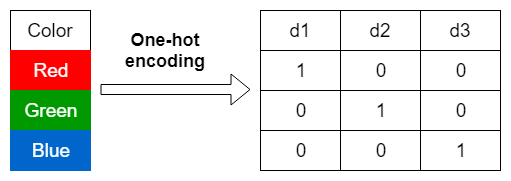

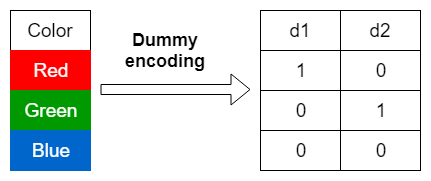

In [55]:
# Concatenate the encoded data with the numeric data 
dummies_df = pd.concat([dummies_df,df[df_numeric]],axis = 1)
dummies_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges,age,bmi,children,charges
0,1,0,0,1,0,0,0,1,19,27.900,0,16884.92400,19,27.900,0,16884.92400
1,0,1,1,0,0,0,1,0,18,33.770,1,1725.55230,18,33.770,1,1725.55230
2,0,1,1,0,0,0,1,0,28,33.000,3,4449.46200,28,33.000,3,4449.46200
3,0,1,1,0,0,1,0,0,33,22.705,0,21984.47061,33,22.705,0,21984.47061
4,0,1,1,0,0,1,0,0,32,28.880,0,3866.85520,32,28.880,0,3866.85520


In [51]:
# dimenthion of the original data set
df.shape

(1338, 7)

In [54]:
# dimention of the encoded data set
dummies_df.shape

(1338, 12)

Notice that the columns number have been increased after one-hot encoding 

7 => 12

if your category has many
possible values, this can greatly increase
your dataset dimensions and this is the disadvatage of one-hot/dummy enconding methods